# {mod}`~matplotlib.pyplot` 教程

pyplot界面简介。


## {mod}`matplotlib.pyplot` 简介

{mod}`matplotlib.pyplot` 是一组函数，使 {mod}`matplotlib` 的工作方式类似于 MATLAB。每个 {mod}`~matplotlib.pyplot` 函数都会对图形进行一些更改：例如，创建图形、在图形中创建绘图区域、在绘图区域中绘制一些线条、用标签装饰图形等。

在 {mod}`matplotlib.pyplot` 中，各种状态会在函数调用之间保持，以便跟踪当前图形和绘图区域等信息，并且绘图函数会指向当前的 Axes（请注意，我们使用大写 Axes来指代 {class}`~matplotlib.axes.Axes` 概念，这是图形的核心部分 [figure_parts](https://matplotlib.org/stable/users/explain/quick_start.html#figure-parts)，而不仅仅是轴的复数形式）。

使用 `pyplot` 生成可视化非常快速：

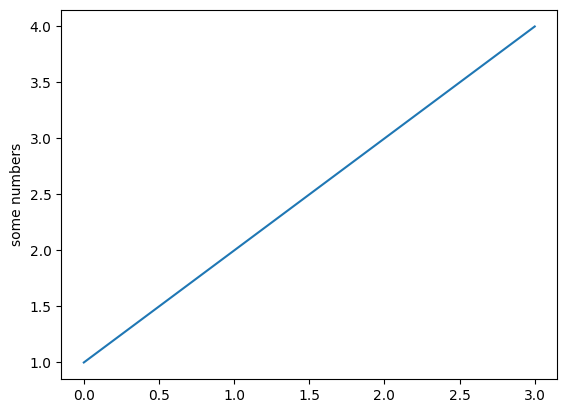

In [1]:
import matplotlib.pyplot as plt

plt.plot([1, 2, 3, 4])
plt.ylabel('some numbers')
plt.show()

你可能想知道为什么x轴的范围是 0-3，而y轴的范围是 1-4。如果你向 {func}`~matplotlib.pyplot.plot` 提供单独的列表或数组，`matplotlib` 会假设它是 `y` 值的序列，并自动为你生成 `x` 值。由于Python的范围从 `0` 开始，所以默认的 `x` 向量与 `y` 具有相同的长度，但以 `0` 开始；因此，`x` 数据为``[0, 1, 2, 3]``。

{func}`~matplotlib.pyplot.plot` 是多功能函数，可以接受任意数量的参数。例如，要绘制x与y的关系，你可以这样写：

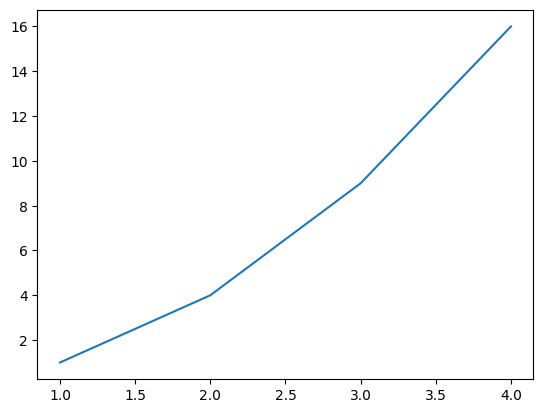

In [2]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16])

### 格式化你的绘图样式

对于每对 `x`、`y` 参数，都有一个可选的第三个参数，即格式字符串，用于指示绘图的颜色和线型。格式字符串中的字母和符号来自 MATLAB，你可以将颜色字符串与线型字符串连接起来。默认的格式字符串是 `'b-'`，表示实线蓝色。例如，要绘制上述内容的红色圆圈，你可以使用以下命令：

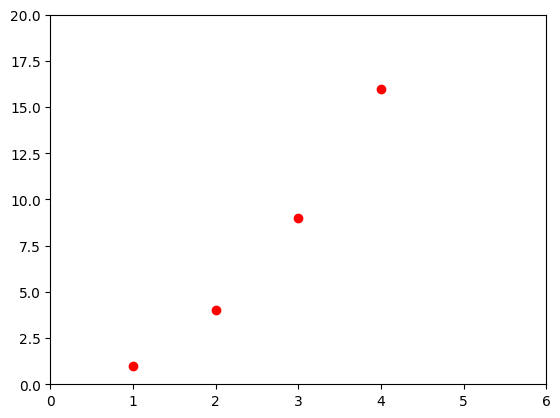

In [3]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16], 'ro')
plt.axis((0, 6, 0, 20))
plt.show()

请参阅 {func}`~matplotlib.pyplot.plot` 文档以获取完整的线条样式和格式字符串列表。在上面的示例中，`~.pyplot.axis` 函数接受 ``[xmin, xmax, ymin, ymax]`` 列表，并指定 Axes 的视口。

如果 matplotlib 仅限于处理列表，那么它在数值处理方面将变得相当无用。通常，你会使用 [numpy](https://numpy.org/) 数组。实际上，所有序列都会在内部转换为 numpy 数组。下面的示例演示了在一个函数调用中使用数组绘制几条具有不同格式样式的线。

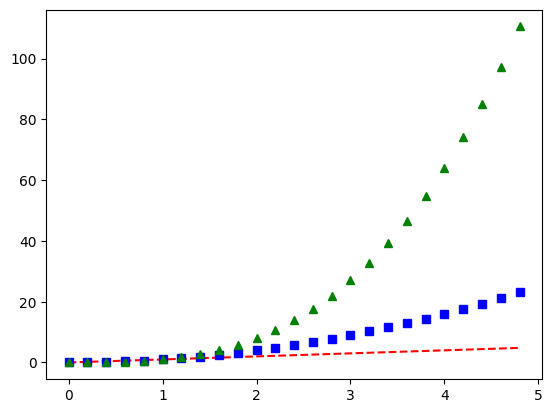

In [5]:
import numpy as np

# evenly sampled time at 200ms intervals
t = np.arange(0., 5., 0.2)

# red dashes, blue squares and green triangles
plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^')
plt.show()

## 使用关键字字符串绘图

在某些情况下，你的数据格式允许你使用字符串访问特定变量。例如，`structured arrays`_ 或 `pandas.DataFrame`。

Matplotlib 允许你使用 ``data`` 关键字参数提供这样的对象。如果提供了该参数，则可以使用这些变量对应的字符串生成图表。

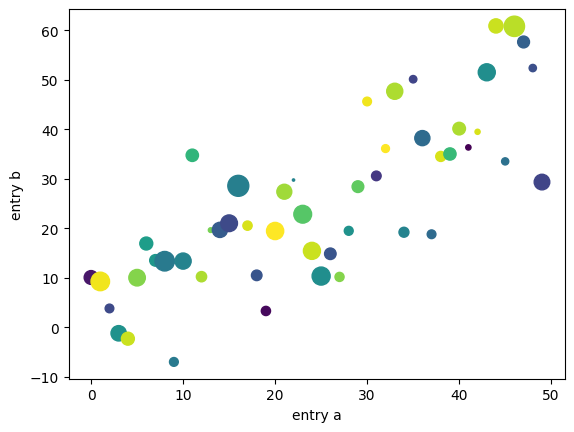

In [6]:
data = {'a': np.arange(50),
        'c': np.random.randint(0, 50, 50),
        'd': np.random.randn(50)}
data['b'] = data['a'] + 10 * np.random.randn(50)
data['d'] = np.abs(data['d']) * 100

plt.scatter('a', 'b', c='c', s='d', data=data)
plt.xlabel('entry a')
plt.ylabel('entry b')
plt.show()

## 使用分类变量绘图

也可以使用分类变量创建图表。Matplotlib 允许你将分类变量直接传递给许多绘图函数。例如：

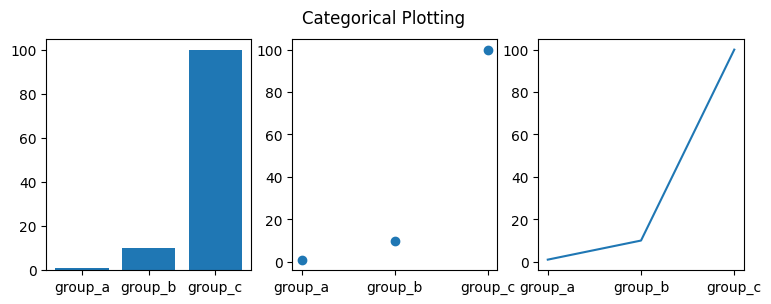

In [7]:
names = ['group_a', 'group_b', 'group_c']
values = [1, 10, 100]

plt.figure(figsize=(9, 3))

plt.subplot(131)
plt.bar(names, values)
plt.subplot(132)
plt.scatter(names, values)
plt.subplot(133)
plt.plot(names, values)
plt.suptitle('Categorical Plotting')
plt.show()

## 控制线条属性

线条有许多可以设置的属性：线宽、虚线样式、抗锯齿等；参见 {class}`matplotlib.lines.Line2D`。有多种方法可以设置线条属性：

* 使用关键字参数：

```python
plt.plot(x, y, linewidth=2.0)
```

* 使用 `Line2D` 实例的设置器方法。`plot` 返回一个 `Line2D` 对象列表；例如，`line1, line2 = plot(x1, y1, x2, y2)`。在下面的代码中，我们将假设只有一个线条，因此返回的列表长度为1。我们使用元组解包与 `line,` 来获取列表的第一个元素：

```python
line, = plt.plot(x, y, '-')
line.set_antialiased(False) # 关闭抗锯齿
```

* 使用 {func}`~matplotlib.pyplot.setp`。下面的示例使用 MATLAB 风格的函数在多个线条上设置多个属性。`setp` 可以透明地处理对象列表或单个对象。您可以使用 Python 关键字参数或 MATLAB 风格字符串/值对：

```python
lines = plt.plot(x1, y1, x2, y2)
# 使用关键字参数
plt.setp(lines, color='r', linewidth=2.0)
# 或者 MATLAB 风格的字符串值对
plt.setp(lines, 'color', 'r', 'linewidth', 2.0)
```

以下是可用的 {class}`~matplotlib.lines.Line2D` 属性。

```{eval-rst}
======================  ==================================================
属性                    值类型
======================  ==================================================
alpha                   float
animated                [True | False]
antialiased or aa       [True | False]
clip_box                a matplotlib.transform.Bbox instance
clip_on                 [True | False]
clip_path               a Path instance and a Transform instance, a Patch
color or c              any matplotlib color
contains                the hit testing function
dash_capstyle           [``'butt'`` | ``'round'`` | ``'projecting'``]
dash_joinstyle          [``'miter'`` | ``'round'`` | ``'bevel'``]
dashes                  sequence of on/off ink in points
data                    (np.array xdata, np.array ydata)
figure                  a matplotlib.figure.Figure instance
label                   any string
linestyle or ls         [ ``'-'`` | ``'--'`` | ``'-.'`` | ``':'`` | ``'steps'`` | ...]
linewidth or lw         float value in points
marker                  [ ``'+'`` | ``','`` | ``'.'`` | ``'1'`` | ``'2'`` | ``'3'`` | ``'4'`` ]
markeredgecolor or mec  any matplotlib color
markeredgewidth or mew  float value in points
markerfacecolor or mfc  any matplotlib color
markersize or ms        float
markevery               [ None | integer | (startind, stride) ]
picker                  used in interactive line selection
pickradius              the line pick selection radius
solid_capstyle          [``'butt'`` | ``'round'`` | ``'projecting'``]
solid_joinstyle         [``'miter'`` | ``'round'`` | ``'bevel'``]
transform               a matplotlib.transforms.Transform instance
visible                 [True | False]
xdata                   np.array
ydata                   np.array
zorder                  any number
======================  ==================================================
```
要获取可设置线条属性的列表，请使用带有线条或线条的 `~.pyplot.setp` 函数作为参数：

```python
In [69]: lines = plt.plot([1, 2, 3])

In [70]: plt.setp(lines)
  alpha: float
  animated: [True | False]
  antialiased or aa: [True | False]
  ...snip
```

## 处理多个图形和轴

MATLAB 和 {mod}`~matplotlib.pyplot` 有当前图形和当前轴的概念。所有绘图函数都应用于当前轴。{func}`~matplotlib.pyplot.gca` 函数返回当前轴（{class}`matplotlib.axes.Axes` 实例），{func}{func}`~matplotlib.pyplot.gcf` 函数返回当前图形（{class}`matplotlib.figure.Figure` 实例）。通常，您不需要担心这个问题，因为它在幕后得到了妥善处理。以下是一个创建两个子图的脚本。

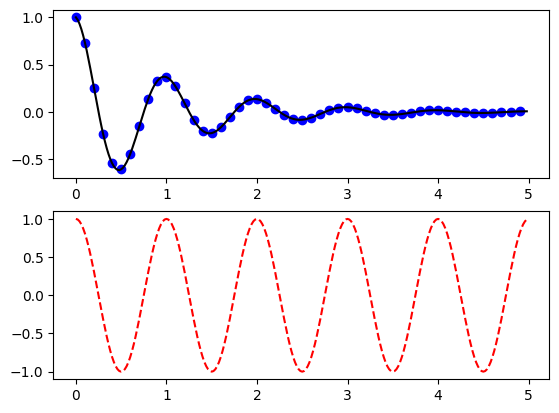

In [8]:
def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)

t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)

plt.figure()
plt.subplot(211)
plt.plot(t1, f(t1), 'bo', t2, f(t2), 'k')

plt.subplot(212)
plt.plot(t2, np.cos(2*np.pi*t2), 'r--')
plt.show()

在这里，`~matplotlib.pyplot.figure`调用是可选的，因为如果没有现有的图形，将创建一个图形，就像如果没有现有的轴一样（等同于显式的`subplot()`调用）。
`~.pyplot.subplot`调用指定了`numrows, numcols, plot_number`，其中`plot_number`的范围从1到`numrows*numcols`。如果`numrows*numcols<10`，则`subplot`调用中的逗号是可选的。因此，`subplot(211)`与`subplot(2, 1, 1)`相同。

你可以创建任意数量的子图和轴。如果你想手动放置轴，即不在矩形网格上，可以使用{mod}`~matplotlib.pyplot.axes`，它允许你以`axes([left, bottom, width, height])`的形式指定位置，其中所有值都是分数坐标（0到1）。

通过使用多个带有递增图形编号的`~matplotlib.pyplot.figure`调用，可以创建多个图形。当然，每个图形都可以包含尽可能多的轴和子图：

```python
import matplotlib.pyplot as plt
plt.figure(1)                # 第一个图形
plt.subplot(211)             # 第一个图形的第一个子图
plt.plot([1, 2, 3])
plt.subplot(212)             # 第一个图形的第二个子图
plt.plot([4, 5, 6])

plt.figure(2)                # 第二个图形
plt.plot([4, 5, 6])          # 默认创建一个subplot()

plt.figure(1)                # 当前图形为第一个；子图212仍然为当前
plt.subplot(211)             # 使第一个图形的子图211成为当前
plt.title('Easy as 1, 2, 3') # 子图211的标题
```

你可以使用{func}`~matplotlib.pyplot.clf`清除当前图形，使用{func}`~matplotlib.pyplot.cla`清除当前轴。如果你觉得状态（特别是当前图像、图形和轴）在幕后被维护让你感到烦恼，不要绝望：这只是一个薄的状态包装器，背后是一个面向对象的API，你可以用它代替。

如果你制作了很多图形，你需要注意到一件事：直到显式地用{func}`~matplotlib.pyplot.close`关闭图形，所需的内存才完全释放。删除对图形的所有引用，或者使用窗口管理器杀死图形出现在屏幕上的窗口是不够的，因为pyplot保持内部引用，直到调用{func}`~matplotlib.pyplot.close`为止。

## 处理文本

{func}`~matplotlib.pyplot.text`可用于在任意位置添加文本，而{func}`~matplotlib.pyplot.xlabel`, {func}`~matplotlib.pyplot.ylabel`和{func}`~matplotlib.pyplot.title`用于在指定位置添加文本。

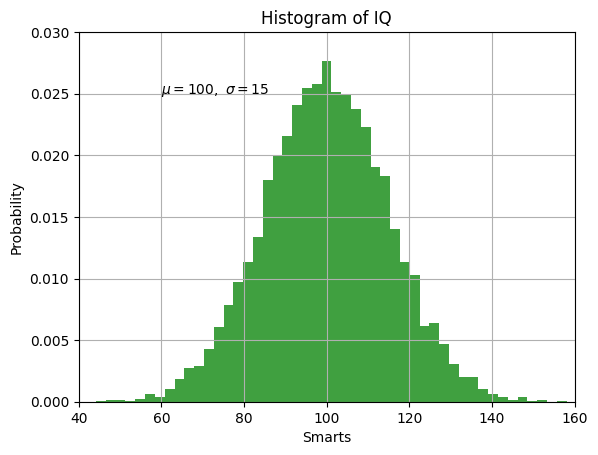

In [9]:
mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)

# the histogram of the data
n, bins, patches = plt.hist(x, 50, density=True, facecolor='g', alpha=0.75)


plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of IQ')
plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
plt.axis([40, 160, 0, 0.03])
plt.grid(True)
plt.show()

所有的 {func}`~matplotlib.pyplot.text` 函数都返回一个 {class}`matplotlib.text.Text` 实例。就像上面的线一样，您可以通过将关键字参数传递给文本函数或使用 {func}`~matplotlib.pyplot.setp` 来自定义属性：

```python
t = plt.xlabel('my data', fontsize=14, color='red')
```

### 在文本中使用数学表达式

Matplotlib 接受任何文本表达式中的 TeX 方程表达式。例如，要在标题中写表达式 $\sigma_i=15$，您可以用美元符号包围的 TeX 表达式编写：

```python
plt.title(r'$\sigma_i=15$')
```

标题字符串前的 ``r`` 很重要，它表示字符串是一个 *原始* 字符串，而不是将反斜杠视为 Python 转义字符。matplotlib 有一个内置的 TeX 表达式解析器和布局引擎，并自带数学字体——有关详细信息，请参阅 `mathtext`。因此，您可以在不要求安装 TeX 的情况下跨平台使用数学文本。对于那些安装了 LaTeX 和 dvipng 的人，还可以使用 LaTeX 格式化文本并将输出直接嵌入到显示图形或保存的 postscript 中——参见 `usetex`。

### 注释文本

上面提到的基本 {func}`~matplotlib.pyplot.text` 函数将文本放置在 Axes 上的任意位置。文本的一个常见用途是对绘图的某些特征进行注释，而 {func}`~matplotlib.pyplot.annotate` 方法提供了辅助功能，使注释变得容易。在注释中，有两个要考虑的点：被注释的位置（由参数 ``xy`` 表示）和文本的位置（由参数 ``xytext`` 表示）。这两个参数都是 ``(x, y)`` 元组。

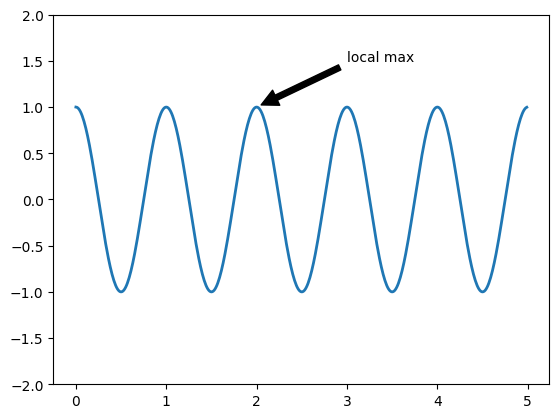

In [10]:
ax = plt.subplot()

t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2*np.pi*t)
line, = plt.plot(t, s, lw=2)

plt.annotate('local max', xy=(2, 1), xytext=(3, 1.5),
             arrowprops=dict(facecolor='black', shrink=0.05),
             )

plt.ylim(-2, 2)
plt.show()

在这个基本示例中，``xy``（箭头尖端）和 ``xytext`` 位置（文本位置）都在数据坐标系中。还有其他各种可以选择的坐标系——请参阅 `annotations-tutorial` 和 `plotting-guide-annotation` 以获取详细信息。

## 对数和其他非线性轴

{mod}`matplotlib.pyplot` 不仅支持线性轴刻度，还支持对数和 logit 刻度。如果数据跨越多个数量级，这通常很有用。改变轴的刻度很容易：

```python
plt.xscale('log')
```

下面显示了四个具有相同数据但 y 轴刻度不同的图示。

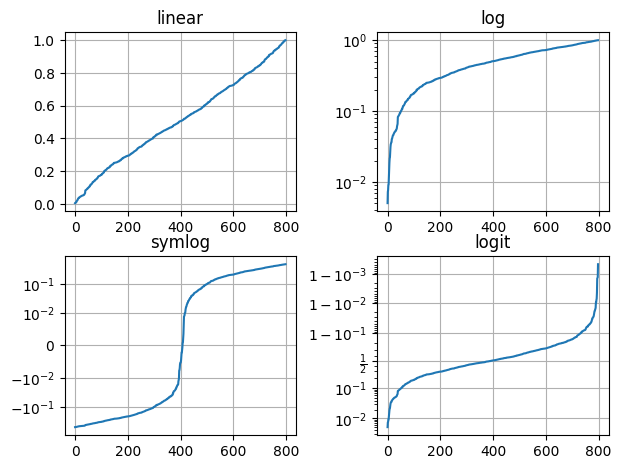

In [11]:
# Fixing random state for reproducibility
np.random.seed(19680801)

# make up some data in the open interval (0, 1)
y = np.random.normal(loc=0.5, scale=0.4, size=1000)
y = y[(y > 0) & (y < 1)]
y.sort()
x = np.arange(len(y))

# plot with various axes scales
plt.figure()

# linear
plt.subplot(221)
plt.plot(x, y)
plt.yscale('linear')
plt.title('linear')
plt.grid(True)

# log
plt.subplot(222)
plt.plot(x, y)
plt.yscale('log')
plt.title('log')
plt.grid(True)

# symmetric log
plt.subplot(223)
plt.plot(x, y - y.mean())
plt.yscale('symlog', linthresh=0.01)
plt.title('symlog')
plt.grid(True)

# logit
plt.subplot(224)
plt.plot(x, y)
plt.yscale('logit')
plt.title('logit')
plt.grid(True)
# Adjust the subplot layout, because the logit one may take more space
# than usual, due to y-tick labels like "1 - 10^{-3}"
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.35)

plt.show()

也可以添加自己的刻度，请参阅 {mod}`matplotlib.scale` 以获取详细信息。